In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import pickle

# 1- PCA 30 Evaluations

In [2]:
load_model = False # if true, it loads a trained model instead of training a new one
models_folder = 'models\\'
X = np.genfromtxt('processed_data\\X_scaled_pca30.csv', delimiter=',')
y = np.genfromtxt('processed_data\\y.csv', delimiter=',')
mask_train = np.genfromtxt('processed_data\\mask_train.csv', delimiter=',', dtype=bool)

In [3]:
X_train = X[mask_train, :]
X_test = X[~mask_train, :]

y_train = y[mask_train]
y_test = y[~mask_train]

1.1- Training or Loading Model

In [4]:
if load_model:
    with open(models_folder+'clf_pca30.pkl', 'rb') as file:
        clf_pca30 = pickle.load(file)
    print('Full Model Loaded')
else:
    print('Training Linear SVM on Full Data...')
    clf_pca30 = LinearSVC(dual=False, multi_class='ovr')
    clf_pca30 = clf_pca30.fit(X_train, y_train)
    with open(models_folder+'clf_pca30.pkl', 'wb') as file:
        pickle.dump(clf_pca30, file)
    print(f'Model Trained on Full Data and stored at\n\t{models_folder+"clf_pca30.pkl"}')    

Training Linear SVM on Full Data...
Model Trained on Full Data and stored at
	models\clf_pca30.pkl


In [5]:
p_train = clf_pca30.predict(X_train)
p_test = clf_pca30.predict(X_test)

1.2- Metrics for Train Data on Full Model

-- Linear SVM Classifier --
Train Accuracy: 87.66%
Confusion Matrix (Train):
[[5714    0   24   17   14   42   46   12   46    8]
 [   2 6541   49    9    7   38   10   15   66    5]
 [  40   79 5022  107  143   33  152  125  172   85]
 [  43   48  192 5177   20  268   62   75  147   99]
 [  21   47   47    8 5251   23   68   14   62  301]
 [ 138   58   68  363  143 4105  165   36  227  118]
 [  52   22   72    5   51   99 5574    9   28    6]
 [  32   57  114   27  110   19    7 5721   20  158]
 [  64  176  132  264   47  238   52   34 4694  150]
 [  46   61   64  125  325  119    5  326   78 4800]]


Normalized Confusion Matrix (Train):
[[96.  0.  0.  0.  0.  1.  1.  0.  1.  0.]
 [ 0. 97.  1.  0.  0.  1.  0.  0.  1.  0.]
 [ 1.  1. 84.  2.  2.  1.  3.  2.  3.  1.]
 [ 1.  1.  3. 84.  0.  4.  1.  1.  2.  2.]
 [ 0.  1.  1.  0. 90.  0.  1.  0.  1.  5.]
 [ 3.  1.  1.  7.  3. 76.  3.  1.  4.  2.]
 [ 1.  0.  1.  0.  1.  2. 94.  0.  0.  0.]
 [ 1.  1.  2.  0.  2.  0.  0. 91.  0.  3.]
 [ 1.  3.  2.  5.  1.  4.  1.  1. 80.  3.]
 [ 1.  1.  1.  2.  5.  2.  0.  5.  1. 81.]]


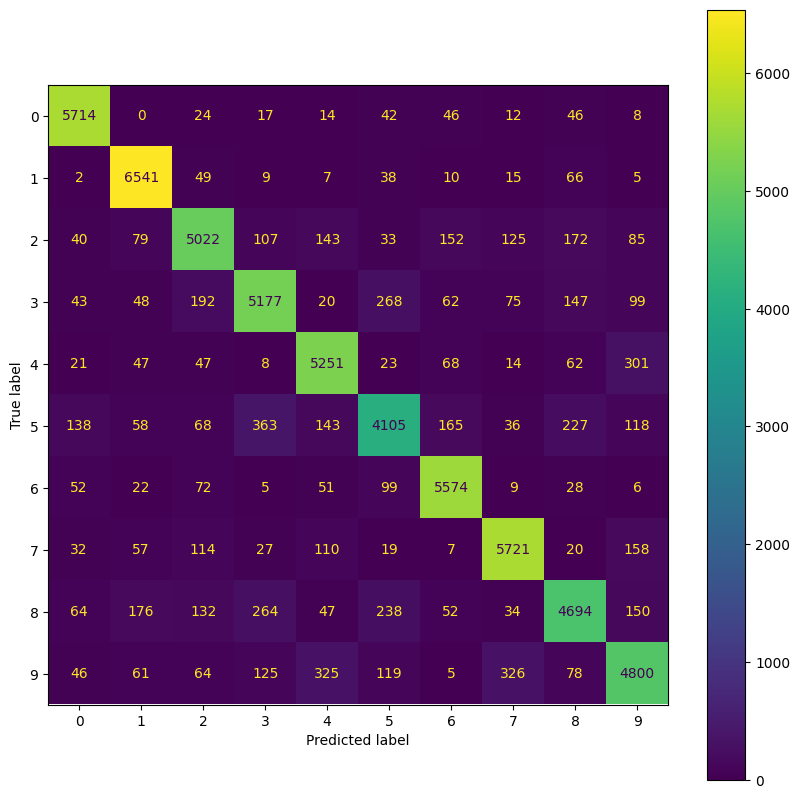

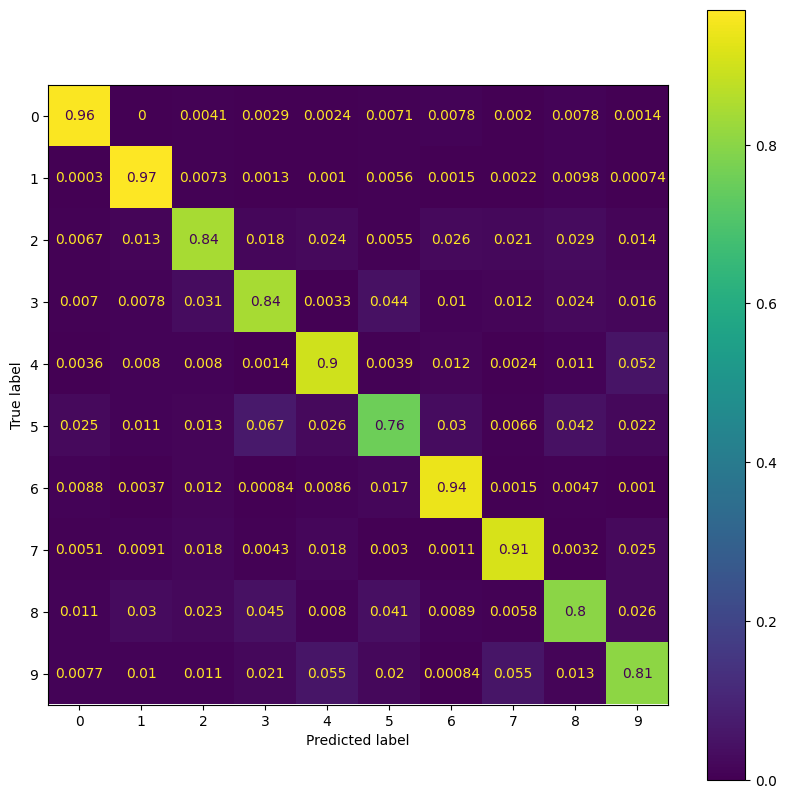

In [6]:
print('-- Linear SVM Classifier --')
print(f'Train Accuracy: {round(clf_pca30.score(X_train, y_train)*100, 2)}%')

cm = confusion_matrix(y_train, p_train)
print(f'Confusion Matrix (Train):\n{cm}')
fig, ax = plt.subplots(figsize=(10,10))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(ax=ax)

cmn = confusion_matrix(y_train, p_train, normalize='true')
print(f'Normalized Confusion Matrix (Train):\n{np.round(cmn*100)}')
fig, ax = plt.subplots(figsize=(10,10))
cmnd = ConfusionMatrixDisplay(cmn)
cmnd.plot(ax=ax)

In [7]:
tp_fp_classes = np.sum(cm, axis=0)
tp_fn_classes = np.sum(cm, axis=1)
list_precisions = []
list_recalls = []
for i in range(cm.shape[0]):
    tp_fp = tp_fp_classes[i]
    tp_fn = tp_fn_classes[i]
    tp = cm[i,i]
    precision = tp / tp_fp
    recall = tp / tp_fn
    list_precisions.append(precision)
    list_recalls.append(recall)
    # print(f'* Class {i} *')
    # print(f'Precision: {precision}')
    # print(f'Recall: {recall}')
    
PR = pd.DataFrame(index=['Precision (Train)', 'Recall (Train)'], columns=range(10))
PR.iloc[0] = list_precisions
PR.iloc[1] = list_recalls
PR

,0,1,2,3,4,5,6,7,8,9
Precision (Train),0.928804,0.922697,0.868257,0.84841,0.85927,0.823636,0.90767,0.898539,0.847292,0.837696
Recall (Train),0.964714,0.970187,0.8429,0.844397,0.898836,0.75724,0.941872,0.913168,0.802256,0.806858


-- Linear SVM Classifier --
Test Accuracy: 88.38%
Confusion Matrix (Test):
[[ 959    0    2    2    1    5    8    1    2    0]
 [   0 1108    3    2    0    3    4    1   14    0]
 [  11   13  871   21   16    3   21   18   44   14]
 [   4    2   26  878    1   44    5   14   17   19]
 [   3    4    8    1  884    4   10    3    9   56]
 [  22    3    5   66   24  687   24    9   34   18]
 [  18    3    5    2   16   16  895    0    3    0]
 [   6   16   30    3   17    2    0  928    3   23]
 [  15   11   20   37   11   35   14   10  806   15]
 [  12   11    9   13   62   25    1   42   12  822]]


Normalized Confusion Matrix (Test):
[[98.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0. 98.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  1. 84.  2.  2.  0.  2.  2.  4.  1.]
 [ 0.  0.  3. 87.  0.  4.  0.  1.  2.  2.]
 [ 0.  0.  1.  0. 90.  0.  1.  0.  1.  6.]
 [ 2.  0.  1.  7.  3. 77.  3.  1.  4.  2.]
 [ 2.  0.  1.  0.  2.  2. 93.  0.  0.  0.]
 [ 1.  2.  3.  0.  2.  0.  0. 90.  0.  2.]
 [ 2.  1.  2.  4.  1.  4.  1.  1. 83.  2.]
 [ 1.  1.  1.  1.  6.  2.  0.  4.  1. 81.]]


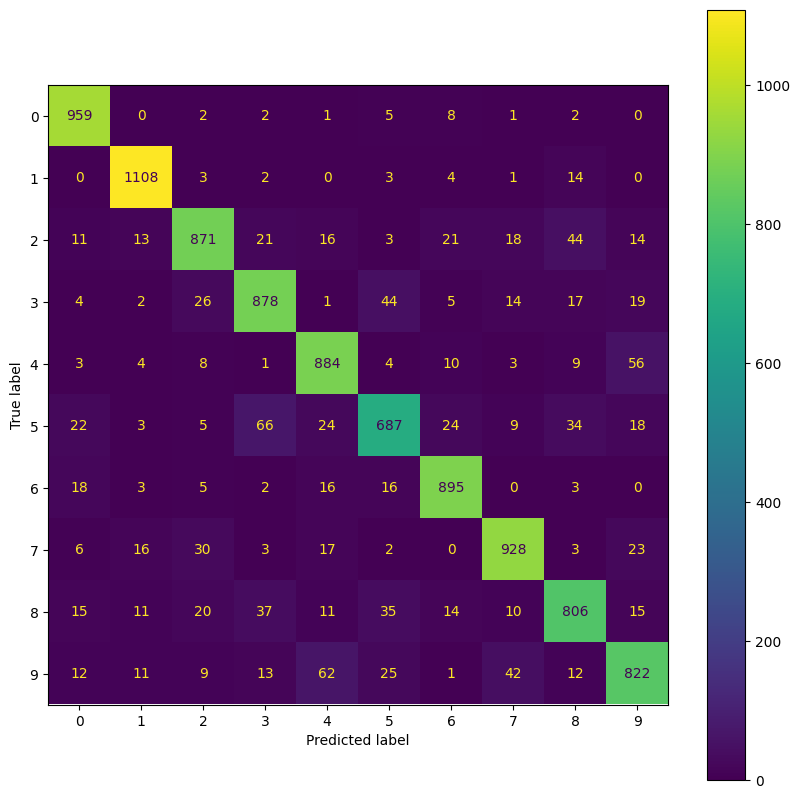

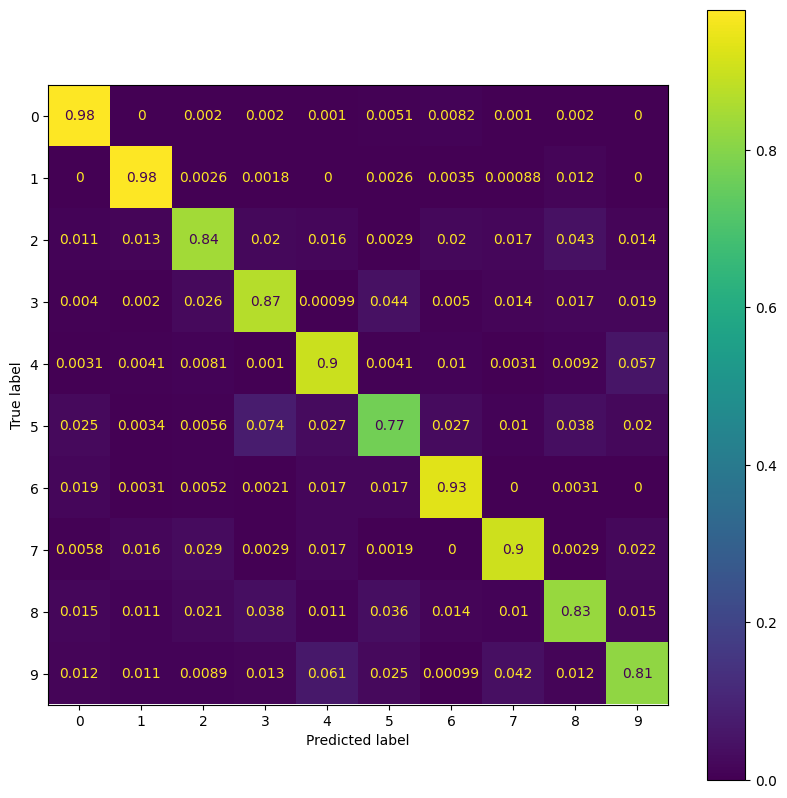

In [8]:
print('-- Linear SVM Classifier --')
print(f'Test Accuracy: {round(clf_pca30.score(X_test, y_test)*100, 2)}%')

cm = confusion_matrix(y_test, p_test)
print(f'Confusion Matrix (Test):\n{cm}')
fig, ax = plt.subplots(figsize=(10,10))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(ax=ax)

cmn = confusion_matrix(y_test, p_test, normalize='true')
print(f'Normalized Confusion Matrix (Test):\n{np.round(cmn*100)}')
fig, ax = plt.subplots(figsize=(10,10))
cmnd = ConfusionMatrixDisplay(cmn)
cmnd.plot(ax=ax)

In [9]:
tp_fp_classes = np.sum(cm, axis=0)
tp_fn_classes = np.sum(cm, axis=1)
list_precisions = []
list_recalls = []
for i in range(cm.shape[0]):
    tp_fp = tp_fp_classes[i]
    tp_fn = tp_fn_classes[i]
    tp = cm[i,i]
    precision = tp / tp_fp
    recall = tp / tp_fn
    list_precisions.append(precision)
    list_recalls.append(recall)
    # print(f'* Class {i} *')
    # print(f'Precision: {precision}')
    # print(f'Recall: {recall}')
    
PR = pd.DataFrame(index=['Precision (Test)', 'Recall (Test)'], columns=range(10))
PR.iloc[0] = list_precisions
PR.iloc[1] = list_recalls
PR

,0,1,2,3,4,5,6,7,8,9
Precision (Test),0.913333,0.9462,0.889683,0.856585,0.856589,0.833738,0.911405,0.904483,0.853814,0.850052
Recall (Test),0.978571,0.976211,0.843992,0.869307,0.900204,0.770179,0.934238,0.902724,0.827515,0.814668


In [10]:
s_train = clf_pca30.decision_function(X_train)
s_test = clf_pca30.decision_function(X_test)
y_train_b = label_binarize(y_train, classes=range(10))
y_test_b = label_binarize(y_test, classes=range(10))

ROC (Train)


(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC (Train)')

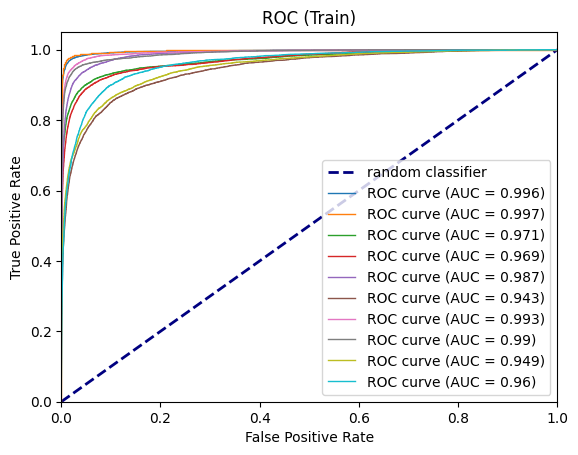

In [25]:
print('ROC (Train)')
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_train_b[:, i], s_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC (Train)")
lw = 1
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=lw)

plt.legend(['random classifier']+[f'ROC curve (AUC = {round(roc_auc[i], 3)})' for i in range(10)])
plt.show()

ROC (Test)


(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC (Test)')

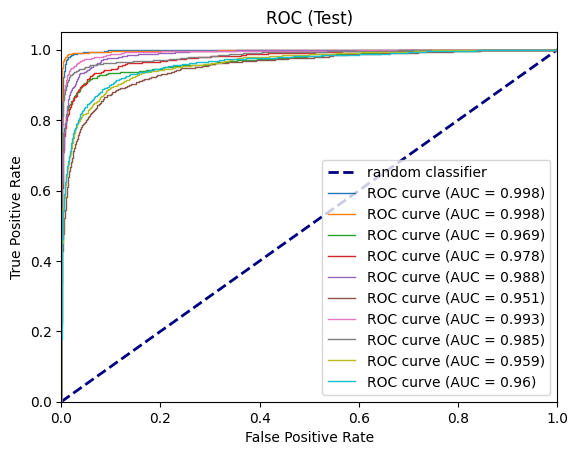

In [26]:
print('ROC (Test)')
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], s_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC (Test)")
lw = 1
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=lw)

plt.legend(['random classifier']+[f'ROC curve (AUC = {round(roc_auc[i], 3)})' for i in range(10)])
plt.show()